# Exploratory Analysis
### DALI 2024 Spring Application - Machine Learning Track

The first step of any machine learning project is to get an idea of the general characteristics of the dataset.  This allows us to get a general idea of trends within the dataset and determine interesting areas for analysis.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip freeze

In [ ]:
df = pd.read_csv('Superstore.csv')
pd.set_option('display.expand_frame_repr', False)  # turns off truncation when printing the dataset

## General Dataset Information

In [ ]:
print("Number of rows: " + str(df.shape[0]))

Number of rows: 9994


In [ ]:
print("Headings: ")
print(df.columns.values.tolist())

Headings: 
['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [ ]:
print("Sample rows: ")
print(df.head())

Sample rows: 
   Unnamed: 0  Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID    Customer Name    Segment        Country  ... Postal Code Region       Product ID         Category Sub-Category                                       Product Name     Sales Quantity  Discount    Profit
0           0     1.0  CA-2016-152156   11/8/2016  11/11/2016             NaN    CG-12520      Claire Gute   Consumer  United States  ...     42420.0  South  FUR-BO-10001798        Furniture    Bookcases                  Bush Somerset Collection Bookcase       NaN      2.0       0.0   41.9136
1           1     NaN             NaN   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States  ...     42420.0  South  FUR-CH-10000454        Furniture       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400      3.0       0.0  219.5820
2           2     3.0             NaN   6/12/2016   6/16/2016    Second Class    DV-13045  Darrin Van Hu

## Missing Data

In [ ]:
print("Order ID: " + str(df.isnull().sum()))

Order ID: Unnamed: 0         0
Row ID           999
Order ID         999
Order Date       999
Ship Date        999
Ship Mode        999
Customer ID      999
Customer Name    999
Segment          999
Country          999
City             999
State            999
Postal Code      999
Region           999
Product ID       999
Category         999
Sub-Category     999
Product Name     999
Sales            999
Quantity         999
Discount         999
Profit           999
dtype: int64


Surprisingly, there is an equal number of cells missing in each column.  I assume the missing data is missing completely at random (if I had to guess, I would assume random data was removed by the DALI team as part of the challenge).  This means that were we to drop rows missing features of interest, it would not introduce bias into my results.  However, one danger of this approach is that doing so could leave us with too little data to train an effective model.\
\
Alternatively, one could attempt to approximate the missing values.  For the quantitaive columns, one could replace missing cells with the mean or median of the column.  Quantitative cells are harder to find an accurate approximation for, and this would likely require some form of deep learning.

## Exploratory Analysis of Quantitative columns

In [ ]:
print("Quantity: ")
print("- Mean: " + str(df["Quantity"].mean()))
print("- Median: " + str(df["Quantity"].median()))
print("- Standard Deviation: " + str(df["Quantity"].std()))

Quantity: 
- Mean: 3.7907726514730404
- Median: 3.0
- Standard Deviation: 2.2318433058628617


In [ ]:
print("Discount:")
print("- Mean: " + str(df["Discount"].mean()))
print("- Median: " + str(df["Discount"].median()))
print("- Standard Deviation: " + str(df["Discount"].std()))

Discount:
- Mean: 0.15568982768204562
- Median: 0.2
- Standard Deviation: 0.20505003934840815


In [ ]:
print("Profit:")
print("- Mean: " + str(df["Profit"].mean()))
print("- Median: " + str(df["Profit"].median()))
print("- Standard Deviation: " + str(df["Profit"].std()))

Profit:
- Mean: 27.61404870483602
- Median: 8.662
- Standard Deviation: 228.13239719792657


## Exploratory Analysis of Qualitative Columns

In [ ]:
print(df["Ship Mode"].value_counts())

Ship Mode
Standard Class    5357
Second Class      1747
First Class       1389
Same Day           502
Name: count, dtype: int64


In [ ]:
print("Number of unique customers: " + str(df["Customer ID"].nunique()))

Number of unique customers: 793


In [ ]:
onePurchase = 0
multiplePurcahses = 0
purchaseCounts = df["Customer ID"].value_counts()

for (customer, count) in purchaseCounts.items():
    if count == 1:
        onePurchase += 1
    else:
        multiplePurcahses += 1

print("One-time customers: " + str(onePurchase))
print("Repeat customers: " + str(multiplePurcahses))
print("Mean number of purchases per customer: " + str(purchaseCounts.mean()))
print("Median number of purchases per customer: " + str(purchaseCounts.median()))
print("Standard deviation number of purchases per customer: " + str(purchaseCounts.std()))

One-time customers: 8
Repeat customers: 785
Mean number of purchases per customer: 11.343001261034049
Median number of purchases per customer: 11.0
Standard deviation number of purchases per customer: 5.739582532530191


In [ ]:
print(df["Segment"].value_counts())

Segment
Consumer       4643
Corporate      2737
Home Office    1615
Name: count, dtype: int64


In [ ]:
print(df["Country"].value_counts())

Country
United States    8995
Name: count, dtype: int64


In [ ]:
cities = df["City"].value_counts()
print(cities.head())  # cities with the top number of purchases

City
New York City    819
Los Angeles      687
Philadelphia     475
San Francisco    460
Seattle          380
Name: count, dtype: int64


In [ ]:
print("Number of unique cities: " + str(len(cities)))

Number of unique cities: 524


In [ ]:
states = df["State"].value_counts()
print(states.head())

State
California      1799
New York        1030
Texas            886
Pennsylvania     535
Washington       458
Name: count, dtype: int64


In [ ]:
print("Number of unique states: " + str(len(states)))

Number of unique states: 49


In [ ]:
regions = df["Region"].value_counts()
print(regions.head())

Region
West       2877
East       2531
Central    2127
South      1460
Name: count, dtype: int64


In [ ]:
category = df["Category"].value_counts()
print(category)

Category
Office Supplies    5423
Furniture          1909
Technology         1663
Name: count, dtype: int64


In [ ]:
subCategory = df["Sub-Category"].value_counts()
print(subCategory)

Sub-Category
Binders        1370
Paper          1233
Furnishings     855
Phones          795
Storage         763
Art             717
Accessories     700
Chairs          560
Appliances      417
Labels          329
Tables          287
Envelopes       225
Bookcases       208
Fasteners       198
Supplies        171
Machines        104
Copiers          63
Name: count, dtype: int64


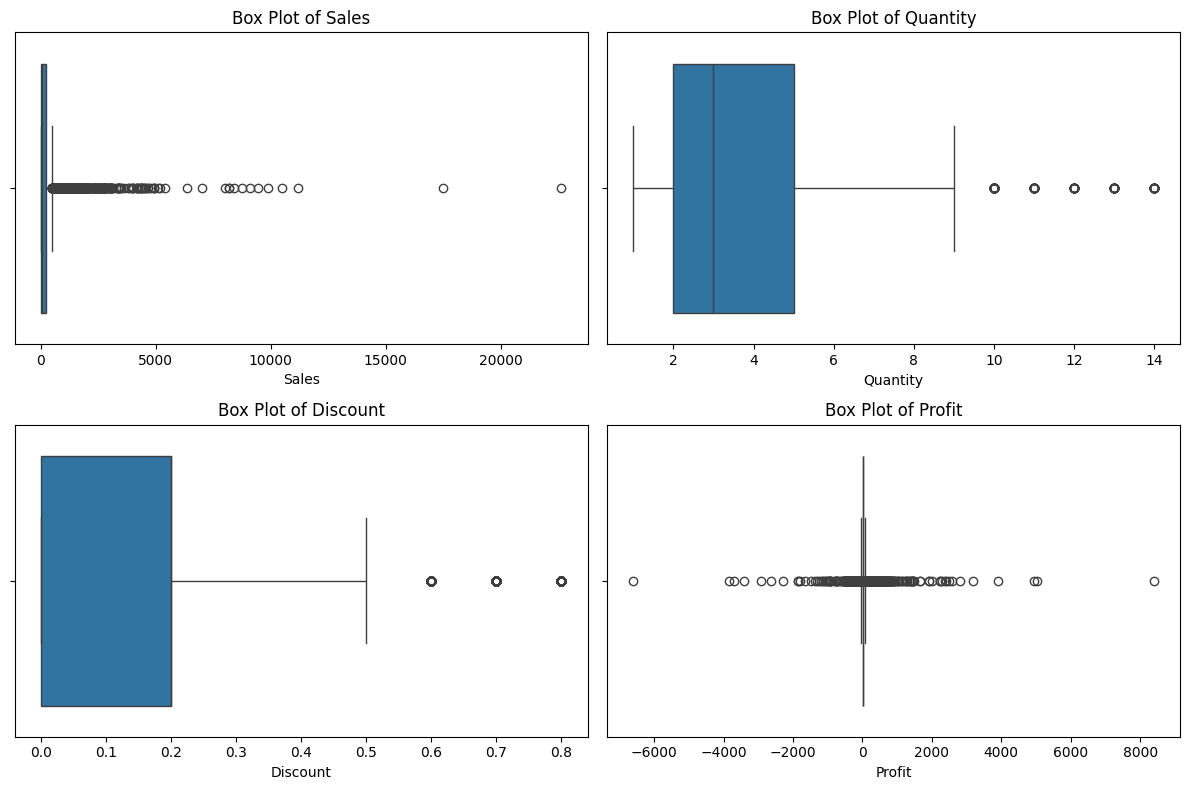

In [ ]:
columns = ['Sales', 'Quantity', 'Discount', 'Profit']

plt.figure(figsize=(12, 8))
for i, var in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, data=df)
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

## Relationships Between Features

### Statistical Tests

In this section, we use an ANOVA statistical test to determine if there is a statistically significant relationship between profit and various qualitative features in the dataset.  \
\
For all of these tests, we consider alpha < 0.05 to be significant.\
\
To use an ANOVA test, we make the following assumptions:
- The distributions of the different categories for the independent variable are normal
- The variance of the distributions of the different categories for the independent variable are equal
- Each sale is independent from the others

In [ ]:
west = df.loc[df['Region'] == "West"]["Profit"].dropna().tolist()
south = df.loc[df['Region'] == "South"]["Profit"].dropna().tolist()
east = df.loc[df['Region'] == "Central"]["Profit"].dropna().tolist()
central = df.loc[df['Region'] == "Central"]["Profit"].dropna().tolist()

print(f_oneway(west, south, central, east))

# The results are statistically significant - there is a strong correlation between region and profit

F_onewayResult(statistic=5.466615529683573, pvalue=0.0009460319609385047)


In [ ]:
office = df.loc[df['Category'] == "Office Supplies"]["Profit"].dropna().tolist()
furniture = df.loc[df['Category'] == "Furniture"]["Profit"].dropna().tolist()
technology = df.loc[df['Category'] == "Technology"]["Profit"].dropna().tolist()

print(f_oneway(office, furniture, technology))

# The results are statistically significant - there is a strong correlation between product category and profit

F_onewayResult(statistic=47.883597327054986, pvalue=2.1206374409101864e-21)


In [ ]:
binders = df.loc[df['Sub-Category'] == "Binders"]["Profit"].dropna().tolist()
paper = df.loc[df['Sub-Category'] == "Paper"]["Profit"].dropna().tolist()
furnishings = df.loc[df['Sub-Category'] == "Furnishings"]["Profit"].dropna().tolist()
phones = df.loc[df['Sub-Category'] == "Phones"]["Profit"].dropna().tolist()
storage = df.loc[df['Sub-Category'] == "Storage"]["Profit"].dropna().tolist()
art = df.loc[df['Sub-Category'] == "Art"]["Profit"].dropna().tolist()
accessories = df.loc[df['Sub-Category'] == "Accessories"]["Profit"].dropna().tolist()
chairs = df.loc[df['Sub-Category'] == "Chairs"]["Profit"].dropna().tolist()
appliances = df.loc[df['Sub-Category'] == "Appliances"]["Profit"].dropna().tolist()
labels = df.loc[df['Sub-Category'] == "Labels"]["Profit"].dropna().tolist()
tables = df.loc[df['Sub-Category'] == "Tables"]["Profit"].dropna().tolist()
envelopes = df.loc[df['Sub-Category'] == "Envelopes"]["Profit"].dropna().tolist()
bookcases = df.loc[df['Sub-Category'] == "Bookcases"]["Profit"].dropna().tolist()
fasteners = df.loc[df['Sub-Category'] == "Fasteners"]["Profit"].dropna().tolist()
supplies = df.loc[df['Sub-Category'] == "Supplies"]["Profit"].dropna().tolist()
machines = df.loc[df['Sub-Category'] == "Machines"]["Profit"].dropna().tolist()
copiers = df.loc[df['Sub-Category'] == "Copiers"]["Profit"].dropna().tolist()

print(f_oneway(binders, paper, furnishings, phones, storage, art, accessories, chairs, appliances, labels,
               tables, envelopes, bookcases, fasteners, supplies, machines, copiers))

# The results are statistically significant - there is a strong correlation between product sub-category and profit

F_onewayResult(statistic=48.35207803298308, pvalue=5.206200411171667e-147)


In [ ]:
standard = df.loc[df['Ship Mode'] == "Standard Class"]["Profit"].dropna().tolist()
second = df.loc[df['Ship Mode'] == "Second Class"]["Profit"].dropna().tolist()
first = df.loc[df['Ship Mode'] == "First Class"]["Profit"].dropna().tolist()
same = df.loc[df['Ship Mode'] == "Same Day"]["Profit"].dropna().tolist()

print(f_oneway(standard, second, first, same))

# The results are not statistically significant - there is no correlation between ship mode and profit

F_onewayResult(statistic=0.29844951666145975, pvalue=0.8265487674803774)


In [ ]:
consumer = df.loc[df['Segment'] == "Consumer"]["Profit"].dropna().tolist()
corporate = df.loc[df['Segment'] == "Corporate"]["Profit"].dropna().tolist()
office = df.loc[df['Segment'] == "Home Office"]["Profit"].dropna().tolist()

print(f_oneway(consumer, corporate, office))

# The results are not statistically significant - there is no correlation between product segment and profit

F_onewayResult(statistic=1.274058809795741, pvalue=0.27975014762339184)


### Heatmap
The heatmap below calculates the Pearson correlation coefficient between different features.  It measures the linear relationship between two variables, where 1 indicates a perfectly positive linear relationship and -1 indicates a perfectly negative linear relationship.  It assumes that the variables are normally distributed and have constant variance.  Notably, it is also incapable of capturing non-linear relationships.

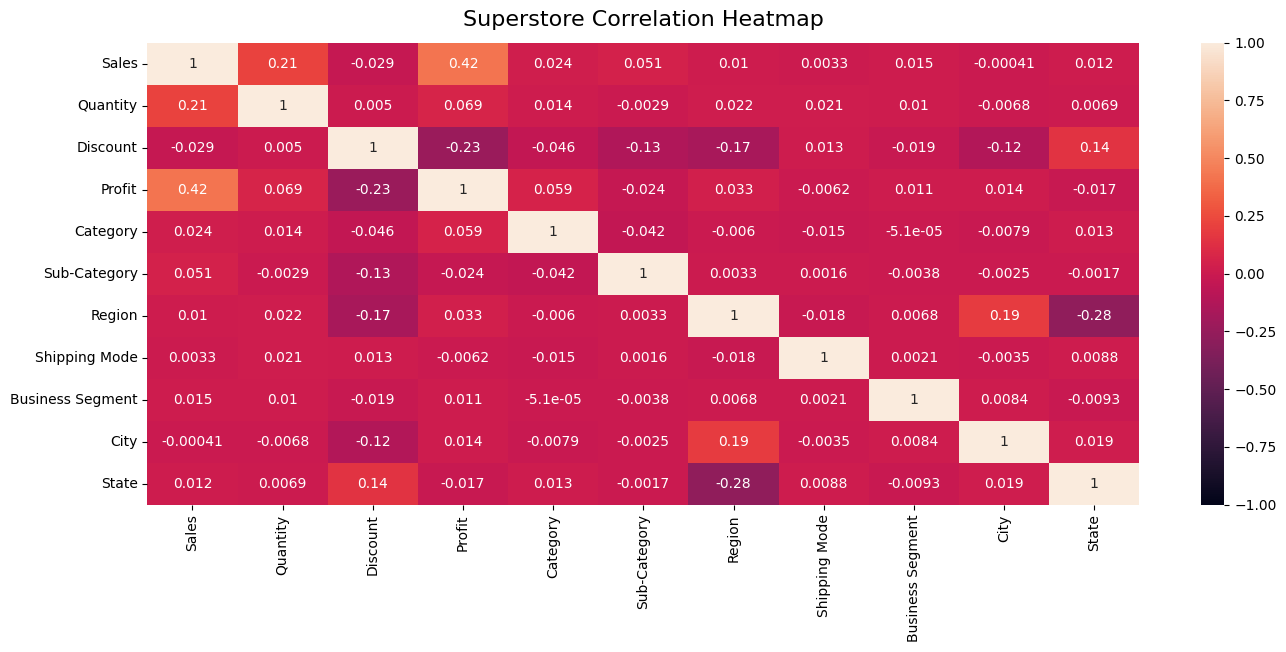

In [ ]:
label_encoder = LabelEncoder()
category_labels = label_encoder.fit_transform(df["Category"])
sub_category_labels = label_encoder.fit_transform(df["Sub-Category"])
region_labels = label_encoder.fit_transform(df["Region"])
ship_labels = label_encoder.fit_transform(df["Ship Mode"])
segment_labels = label_encoder.fit_transform(df["Segment"])
city_labels = label_encoder.fit_transform(df["City"])
state_labels = label_encoder.fit_transform(df["State"])

correlation_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
correlation_df = df[correlation_columns].copy()
correlation_df["Category"] = category_labels
correlation_df["Sub-Category"] = sub_category_labels
correlation_df["Region"] = region_labels
correlation_df["Shipping Mode"] = ship_labels
correlation_df["Business Segment"] = segment_labels
correlation_df["City"] = city_labels
correlation_df["State"] = state_labels

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Superstore Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

### Linear Regression
It seems suprising to me that there is no strong linear relationship between any of the features in the dataset.  Let's use linear regression as a means of verifying this finding.  We use the correlation coefficient to measure the strength of the linear relationship between the two quantitative variables.

We drop all rows that have a null value for discount, profit, and/or quantity.  As we are assuming data is missing completely at random, this approach will not introduce bias into our results.  On the other hand, replacing all missing values with the median for that column (or another fixed value) could skew the linear regression

In [ ]:
df.dropna(subset=["Discount", "Profit", "Quantity"], inplace=True)
print("Number of rows: " + str(df.shape[0])) # make sure we still have enough rows

Number of rows: 7313


In [ ]:
discount = df["Discount"].to_numpy().reshape(-1, 1)
profit = df["Profit"].to_numpy().reshape(-1, 1)
quantity = df["Quantity"].to_numpy().reshape(-1, 1)

### Discount to Predict Profit

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(discount, profit)
predictions = regr.predict(discount)

In [ ]:
print("Coefficients: \n", regr.coef_)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(profit, predictions))

# The correlation coefficient is 0.05, indicating there is little to no linear relationship between discount and proft.

Coefficients: 
 [[-243.13355422]]
Coefficient of determination: 0.05


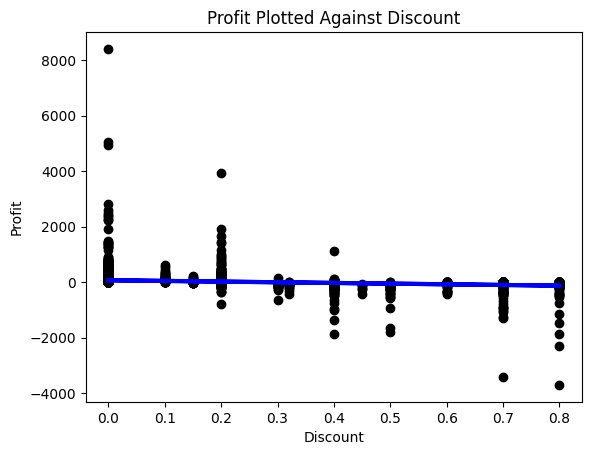

In [ ]:
plt.scatter(discount, profit, color="black")
plt.title("Profit Plotted Against Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.plot(discount, predictions, color="blue", linewidth=3)
plt.show()

# Looking at the scatterplot, it seems there is little to no linear relationship between profit and discount.

### Quantity to Predict Profit

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(quantity, profit)
predictions = regr.predict(quantity)

In [ ]:
print("Coefficients: \n", regr.coef_)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(profit, predictions))

# The correlation coefficient is 0.01, indicating there is little to no linear relationship between quantity and proft.

Coefficients: 
 [[7.53206245]]
Coefficient of determination: 0.01


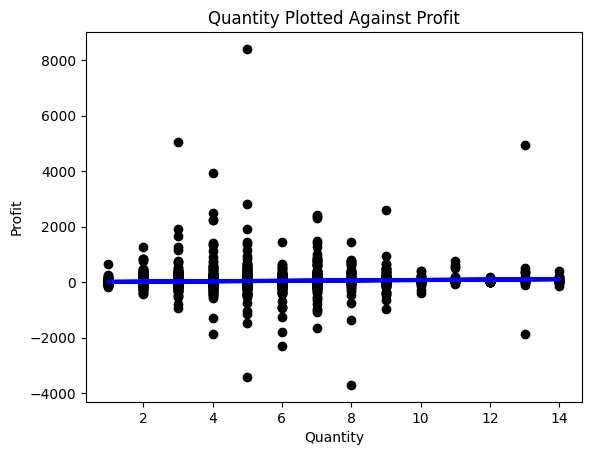

In [ ]:
plt.scatter(quantity, profit, color="black")
plt.title("Quantity Plotted Against Profit")
plt.xlabel("Quantity")
plt.ylabel("Profit")
plt.plot(quantity, predictions, color="blue", linewidth=3)
plt.show()

# Looking at the scatterplot, it seems there is little to no linear relationship between quantity and profit.

### Discount to Predict Quantity

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(discount, quantity)
predictions = regr.predict(discount)

In [ ]:
print("Coefficients: \n", regr.coef_)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(quantity, predictions))

# The correlation coefficient is 0.00, indicating there is no linear relationship between discount and quantity.

Coefficients: 
 [[0.00976227]]
Coefficient of determination: 0.00


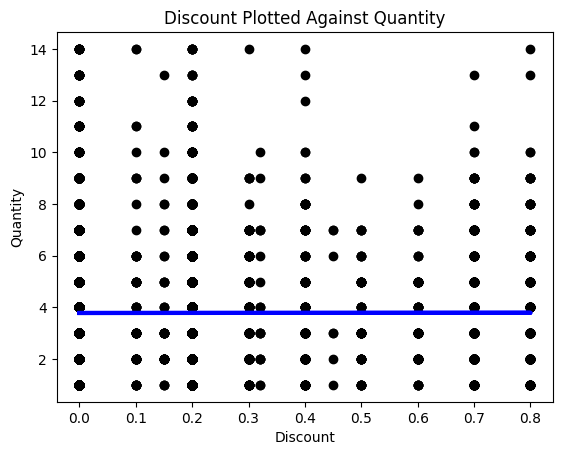

In [ ]:
plt.scatter(discount, quantity, color="black")
plt.title("Discount Plotted Against Quantity")
plt.xlabel("Discount")
plt.ylabel("Quantity")
plt.plot(discount, predictions, color="blue", linewidth=3)
plt.show()

# Looking at the scatterplot, it seems there is little to no linear relationship between discount and quantity.

Given the absence of a strong linear relationship between any of the features, we must be sure to use non-linear models to make predictions about this dataset.  Non-linear models, which can capture more complex relationships between variables, would likely be more suitable.

## Areas to Explore

From this analysis, I see two interesting areas of analysis I will focus the rest of this project on:
1. There are a lot of missing cells in the dataset.  We can replace the mising quantitiative cells with the median of the column, but there is no easy fix for missing qualitative cells.  I plan to develop deep-learning based models to predict missing values for the qualitative columns.  Specifically, I plan to predict product category and subcategory from product name.
2. The most important column for a superstore in this dataset is the profit of each purchase.  I plan to develop machine-learning based methods to predict if the profit of a purchase will be above or below the median profit.